In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nslkdd/KDDTest+.arff
/kaggle/input/nslkdd/KDDTest-21.arff
/kaggle/input/nslkdd/KDDTest1.jpg
/kaggle/input/nslkdd/KDDTrain+.txt
/kaggle/input/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/KDDTest-21.txt
/kaggle/input/nslkdd/KDDTest+.txt
/kaggle/input/nslkdd/KDDTrain+.arff
/kaggle/input/nslkdd/index.html
/kaggle/input/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/KDDTrain1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/nslkdd/nsl-kdd/index.html
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain1.jpg


In [2]:
columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes',
    'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
    'num_compromised','root_shell','su_attempted','num_root',
    'num_file_creations','num_shells','num_access_files',
    'num_outbound_cmds','is_host_login','is_guest_login','count',
    'srv_count','serror_rate','srv_serror_rate','rerror_rate',
    'srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
    'dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate',
    'label','difficulty'
]


<h1>Description of columns</h1>
<h4>duration — Time (in seconds) that the connection lasted.

protocol_type — Network protocol used (e.g., TCP, UDP, ICMP).

service — Network service on the destination (e.g., http, ftp, smtp).

flag — Status of the connection (e.g., normal or error condition flags).

src_bytes — Number of data bytes sent from source to destination.

dst_bytes — Number of data bytes sent from destination to source.

land — Binary; 1 if connection is from/to the same host/port, else 0.

wrong_fragment — Count of wrong fragments in the connection.

urgent — Number of urgent packets in the connection.

hot — Count of “hot” indicators in the connection (suspicious events).

num_failed_logins — Number of failed login attempts.

logged_in — Binary; 1 if successfully logged in, else 0.

num_compromised — Number of compromised conditions.

root_shell — Binary; 1 if a root shell was obtained, else 0.

su_attempted — Binary; 1 if a superuser (su) attempt was made, else 0.

num_root — Number of root accesses by the connection.

num_file_creations — Number of file creation operations.

num_shells — Number of shell prompts invoked.

num_access_files — Number of operations on access control files.

num_outbound_cmds — Count of outbound commands (in FTP, etc.).

is_host_login — Binary; 1 if the login was performed locally on host.

is_guest_login — Binary; 1 if a guest login was used.

count — Number of connections to the same host as current in past 2 sec.

srv_count — Number of connections to the same service as current in past 2 sec.

serror_rate — % of connections that have S0, S1, S2, S3 errors (same host).

srv_serror_rate — Same as above but for same service.

rerror_rate — % of connections with REJ errors (same host).

srv_rerror_rate — Same as above but for same service.

same_srv_rate — % of connections to same service in current host.

diff_srv_rate — % of connections to different services on current host.

srv_diff_host_rate — % of connections to different hosts but same service.

dst_host_count — Number of connections to the same destination host.

dst_host_srv_count — Number of connections to the same service on destination host.

dst_host_same_srv_rate — % of same-service connections on destination host.

dst_host_diff_srv_rate — % of different-service connections on destination host.

dst_host_same_src_port_rate — % of connections with same source port on dest host.

dst_host_srv_diff_host_rate — % of same-service/different-host connections on dest host.

dst_host_serror_rate — % of S-error connections on destination host.

dst_host_srv_serror_rate — % of S-error for same service on dest host.

dst_host_rerror_rate — % of REJ errors on destination host.

dst_host_srv_rerror_rate — % of REJ errors for same service on dest host.

label — Class label indicating normal or specific attack type (e.g., DoS, Probe, R2L, U2R, Normal).

difficulty — Difficulty level of detecting this record (used in NSL-KDD for evaluation).</h4>

In [3]:
df_train=pd.read_csv("/kaggle/input/nslkdd/KDDTrain+.txt",names=columns)

In [4]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
df_train.shape

(125973, 43)

In [6]:
 list=df_train['label'].unique() #ye numpy array deta hai

In [7]:
final_list_target=list.tolist() 
print(final_list_target) #ye list return krta hai

['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep', 'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd', 'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land', 'loadmodule', 'spy', 'perl']


<h1>Different types of attack in our Dataset</h1>
<h4>normal — Normal benign network traffic with no malicious intent.

neptune — SYN flood DoS attack that exhausts server resources by sending many half-open connections.

warezclient — Unauthorized file download using a client program (attempt to steal copyrighted files).

ipsweep — Scans multiple IP addresses looking for active hosts (reconnaissance).

portsweep — Scans multiple ports on a host to find open ports (reconnaissance).

teardrop — Fragmentation attack that sends overlapping IP fragments to crash the target system.

nmap — Network mapper scan used for host/port discovery (reconnaissance tool).

satan — Automated scanning attack exploring vulnerabilities across network range.

smurf — ICMP flood DoS where broadcast ping replies overwhelm the victim.

pod — Ping of Death DoS that sends oversized ICMP packets to crash the target.

back — Backdoor attack opening unauthorized remote access on the target.

guess_passwd — Brute-force password guessing attempts to break authentication.

ftp_write — Unauthorized write to FTP server to modify or upload files.

multihop — Remote exploit attempting to use intermediate hosts to reach the target.

rootkit — Malware that hides its presence and provides privileged access to the attacker.

buffer_overflow — Exploit sending oversized input to crash or hijack a program.

imap — Exploitation of IMAP service, often to gain unauthorized access or crash mail server.

warezmaster — Hacker uses privileged access to distribute or download illegal software.

phf — Exploit against old web server CGI scripts to execute arbitrary commands.

land — Attack where source and destination IP and port are the same, causing the system to crash.

loadmodule — Loading of unauthorized kernel modules to gain control or persist malware.

spy — Attack where a process captures sensitive data (keylogger/packet sniffer).

perl — Exploit using malicious Perl scripts to control or compromise the target.</h4>

In [8]:
# train ka numeric datatype
df_num_train=df_train.select_dtypes(include=np.number) # np.number already include int and float

In [9]:
df_num_train.shape

(125973, 39)

<h3>so from total of 43 columns 39 include int and float </h3>

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

<h2> no null values anywhere</h2>

In [11]:
# ab categorical and numeric columns alaga kr rhe h
train_category_cols=df_train.select_dtypes(include='object').columns
train_numeric_cols=df_train.select_dtypes(exclude='int').columns

In [12]:
# grouping columns acc to their working 
basic_features = [
    'duration','protocol_type','service','flag',
    'src_bytes','dst_bytes','land'
]

content_features = [
    'wrong_fragment','urgent','hot','num_failed_logins','logged_in',
    'num_compromised','root_shell','su_attempted','num_root',
    'num_file_creations','num_shells','num_access_files',
    'num_outbound_cmds','is_host_login','is_guest_login'
]

time_based_features = [
    'count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate',
    'diff_srv_rate','srv_diff_host_rate'
]

host_based_features = [
    'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
    'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate',
    'dst_host_srv_rerror_rate'
]


<h1>classifying too much columns into groups</h1>
<h3>Basic Features → Describe the fundamental properties of a single network connection (protocol, service, duration, bytes, flags).

Content Features → Examine the payload content of the connection to detect suspicious login or shell activities.

Time-based Features → Measure short-term traffic statistics over a 2-second window for the same host or service.

Host-based Features → Measure long-term traffic statistics over many connections to the same destination host.</h3>

In [13]:
# checking ki sb columns ko hmne include kr liya

total = (
    len(basic_features) +
    len(content_features) +
    len(time_based_features) +
    len(host_based_features)
)

print(total)
if(total+2==df_train.shape[1]): # plus 2 isliye kiya , bcoz isme hmne 2 include nhi liye(label and difficulty)
    print("all covered")
else:
    print("some colums left to group")

41
all covered


In [14]:
# cheking these 3 columns from category 1
for col in ['protocol_type', 'service', 'flag']:
    print(col, "have unique no of cols =", df_train[col].nunique())
# service ka unique count sabse jyada hai    

protocol_type have unique no of cols = 3
service have unique no of cols = 70
flag have unique no of cols = 11


In [15]:
#target column ka look
df_train['label'].value_counts().head()

label
normal       67343
neptune      41214
satan         3633
ipsweep       3599
portsweep     2931
Name: count, dtype: int64

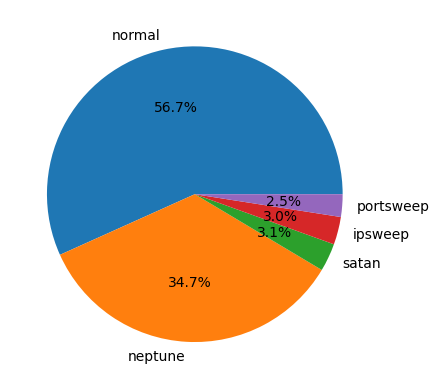

In [16]:
import matplotlib.pyplot as plt

counts = df_train['label'].value_counts().head()

plt.figure()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()
# top 5 cols ka graph

In [17]:
#Entering phase 3
df_train.isnull().sum()
#we can see here that there is no null value in full dataset

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [18]:
#cheking for duplicate rows
df_train.duplicated().sum()


np.int64(0)

In [19]:
#checking for columns which never change
df_train.nunique().sort_values()
# so num_outbound_cmds  mein 1 hi value hai , hence its better to drop it


num_outbound_cmds                 1
land                              2
root_shell                        2
logged_in                         2
is_host_login                     2
is_guest_login                    2
wrong_fragment                    3
protocol_type                     3
num_shells                        3
su_attempted                      3
urgent                            4
num_failed_logins                 6
num_access_files                 10
flag                             11
difficulty                       22
label                            23
hot                              28
num_file_creations               35
srv_diff_host_rate               60
srv_rerror_rate                  62
service                          70
dst_host_srv_diff_host_rate      75
num_root                         82
rerror_rate                      82
srv_serror_rate                  86
num_compromised                  88
serror_rate                      89
diff_srv_rate               


Column: num_outbound_cmds
  0: 100.00%


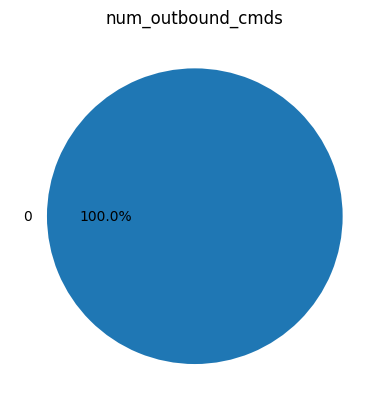


Column: land
  0: 99.98%
  1: 0.02%


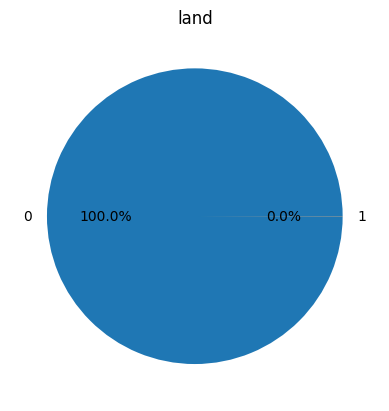


Column: root_shell
  0: 99.87%
  1: 0.13%


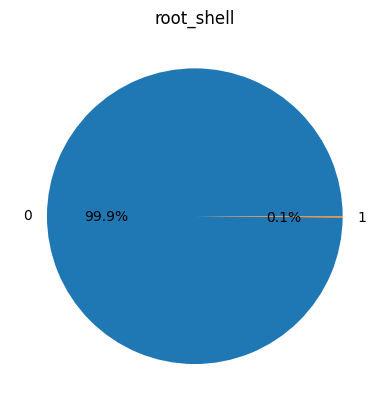


Column: logged_in
  0: 60.43%
  1: 39.57%


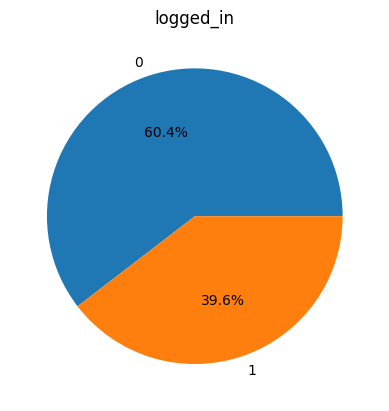


Column: is_host_login
  0: 100.00%
  1: 0.00%


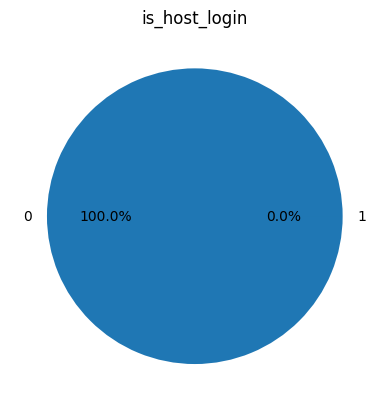


Column: is_guest_login
  0: 99.06%
  1: 0.94%


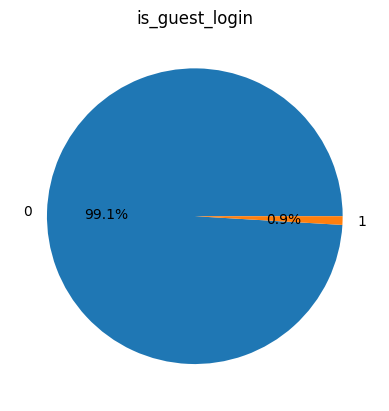


Column: wrong_fragment
  0: 99.13%
  3: 0.70%
  1: 0.16%


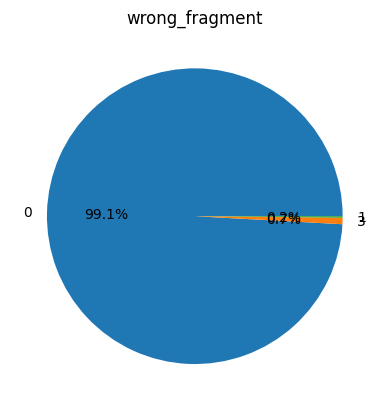


Column: protocol_type
  tcp: 81.52%
  udp: 11.90%
  icmp: 6.58%


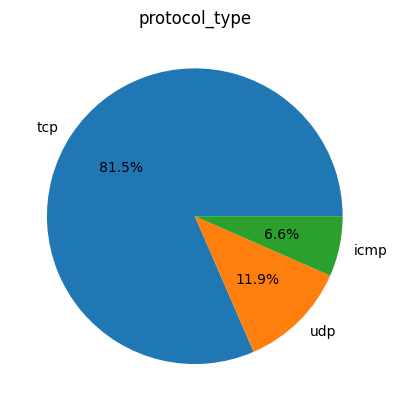


Column: num_shells
  0: 99.96%
  1: 0.03%
  2: 0.00%


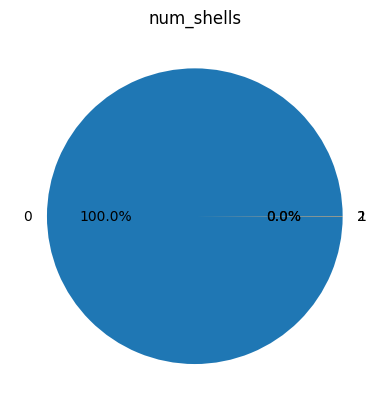


Column: su_attempted
  0: 99.94%
  2: 0.05%
  1: 0.02%


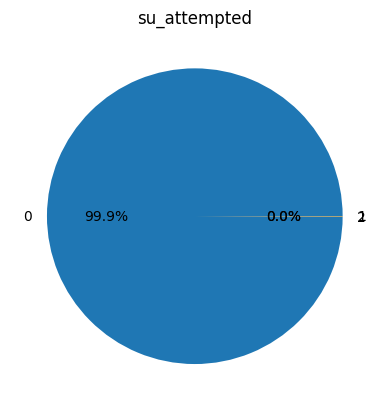


Column: urgent
  0: 99.99%
  1: 0.00%
  2: 0.00%
  3: 0.00%


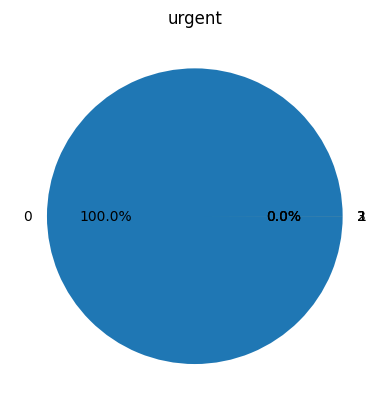

In [20]:
import matplotlib.pyplot as plt

cols = ['num_outbound_cmds','land','root_shell','logged_in',
        'is_host_login','is_guest_login','wrong_fragment',
        'protocol_type','num_shells','su_attempted','urgent']

for col in cols:
    counts = df_train[col].value_counts()
    
    # Calculate percentages
    percentages = (counts / counts.sum()) * 100
    
    # Print results
    print(f"\nColumn: {col}")
    for value, pct in percentages.items():
        print(f"  {value}: {pct:.2f}%")
    
    # Show pie chart for top values
    plt.figure()
    percentages.head().plot(kind='pie', autopct='%1.1f%%')
    plt.title(col)
    plt.ylabel('')
    plt.show()



In [21]:
# so ab binary columns ki baat krni hai
binary_cols = [
    'land','logged_in','root_shell','su_attempted',
    'is_host_login','is_guest_login'
]

for col in binary_cols:
    print(col, df_train[col].unique())
    # here i found su_attempted in not acctually binary 
    # it contain values from 0,1,2


land [0 1]
logged_in [0 1]
root_shell [0 1]
su_attempted [0 1 2]
is_host_login [0 1]
is_guest_login [0 1]



Column: land
  0: 99.98%
  1: 0.02%


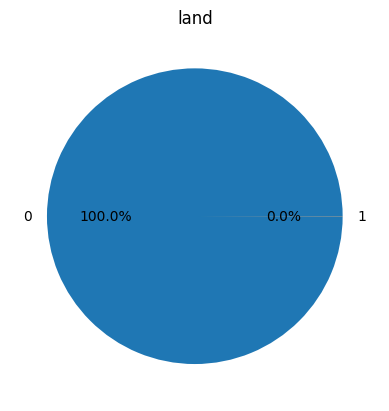


Column: logged_in
  0: 60.43%
  1: 39.57%


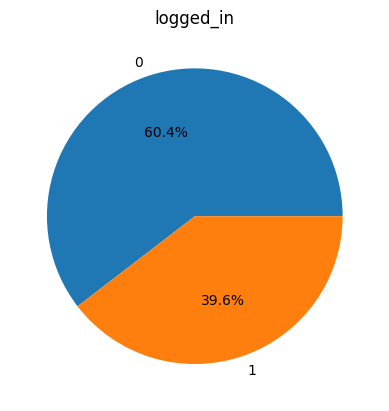


Column: root_shell
  0: 99.87%
  1: 0.13%


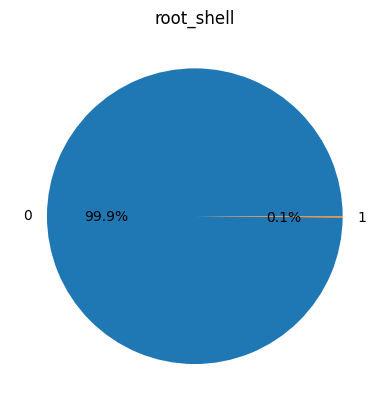


Column: su_attempted
  0: 99.94%
  2: 0.05%
  1: 0.02%


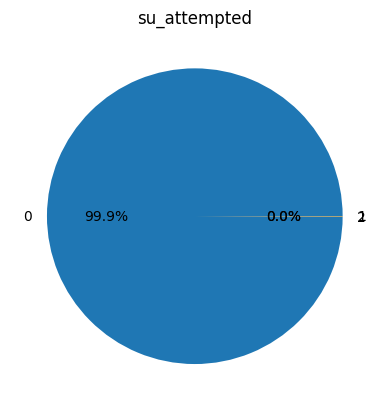


Column: is_host_login
  0: 100.00%
  1: 0.00%


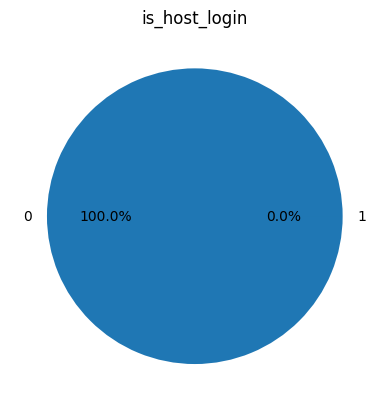


Column: is_guest_login
  0: 99.06%
  1: 0.94%


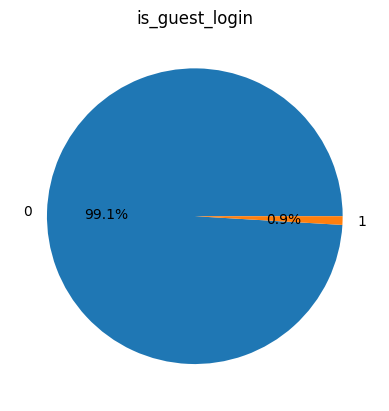

In [22]:
for col in binary_cols:
    counts = df_train[col].value_counts()
    
    # Calculate percentages
    percentages = (counts / counts.sum()) * 100
    
    # Print results
    print(f"\nColumn: {col}")
    for value, pct in percentages.items():
        print(f"  {value}: {pct:.2f}%")
    
    # Show pie chart for top values
    plt.figure()
    percentages.head().plot(kind='pie', autopct='%1.1f%%')
    plt.title(col)
    plt.ylabel('')
    plt.show()

In [23]:
# cheking numeric columns values range
df_train.describe()
# from here we can observe that in full dataset no negative values

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [24]:
# next phase ab label ke baare mein janna h
df_train['label'].value_counts()
# nearly half of the cases toh normal hi hai
# kuch attack in 60k and kuch in one digit 2 digit

label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

<h1> Rare attacks ke baree mein thora dekhte h</h1>
<h3>is there any special pattern for these rare attacks</h3>

In [25]:
# jin attacks ke counts less than 10 h unko analyze krna

rare_labels = ['rootkit','loadmodule','ftp_write','multihop','phf','perl','spy']

df_rare_attacks = df_train[df_train['label'].isin(rare_labels)].copy()
df_rare_attacks = df_rare_attacks.sort_values(by='label').reset_index(drop=True)
df_rare_attacks

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,32,tcp,ftp,SF,104,449,0,0,0,2,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,ftp_write,7
1,134,tcp,login,SF,100,39445,0,0,2,0,...,0.50,1.00,0.50,0.00,0.00,0.00,0.00,0.00,ftp_write,3
2,67,tcp,login,SF,157,2703,0,0,1,0,...,0.50,1.00,0.50,0.00,0.00,0.00,0.00,0.00,ftp_write,3
3,0,tcp,ftp_data,SF,676,0,0,0,0,0,...,1.00,0.00,1.00,0.50,0.00,0.00,0.00,0.00,ftp_write,15
4,0,tcp,ftp_data,SF,613,0,0,0,0,0,...,1.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,ftp_write,7
5,0,tcp,ftp_data,SF,0,5,0,0,0,0,...,1.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,ftp_write,9
6,26,tcp,ftp,SF,116,451,0,0,0,2,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,ftp_write,7
7,0,tcp,ftp_data,SF,0,5,0,0,0,0,...,1.00,0.00,1.00,0.40,0.00,0.00,0.00,0.00,ftp_write,14
8,31,tcp,telnet,SF,142,1278,0,0,0,0,...,0.60,0.60,0.20,0.00,0.00,0.00,0.00,0.00,loadmodule,1
9,103,tcp,telnet,SF,302,8876,0,0,0,2,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,loadmodule,0


In [26]:
# distinctive features
df_rare_attacks.describe().T

print("Now for full dataset")

df_rare_attacks.describe().T


Now for full dataset


,count,mean,std,min,25%,50%,75%,max
duration,43.0,85.093023,161.311266,0.0,0.000,25.00,82.00,718.00
src_bytes,43.0,243.627907,362.821550,0.0,41.500,112.00,273.00,1727.00
dst_bytes,43.0,38284.976744,164427.737056,0.0,332.000,1540.00,8127.00,988002.00
land,43.0,0.000000,0.000000,0.0,0.000,0.00,0.00,0.00
wrong_fragment,43.0,0.000000,0.000000,0.0,0.000,0.00,0.00,0.00
urgent,43.0,0.093023,0.366057,0.0,0.000,0.00,0.00,2.00
hot,43.0,1.023256,2.415115,0.0,0.000,0.00,2.00,15.00
num_failed_logins,43.0,0.023256,0.152499,0.0,0.000,0.00,0.00,1.00
logged_in,43.0,0.720930,0.453850,0.0,0.000,1.00,1.00,1.00
num_compromised,43.0,1.837209,6.665227,0.0,0.000,0.00,0.00,38.00


In [27]:
df_train.describe().T


,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [28]:
attack_map = {
    'normal': 'normal',

    'back': 'DoS','land': 'DoS','neptune': 'DoS','pod': 'DoS',
    'smurf': 'DoS','teardrop': 'DoS',

    'satan': 'Probe','ipsweep': 'Probe','nmap': 'Probe','portsweep': 'Probe',

    'ftp_write': 'R2L','guess_passwd': 'R2L','imap': 'R2L',
    'multihop': 'R2L','phf': 'R2L','spy': 'R2L','warezclient': 'R2L',
    'warezmaster': 'R2L',

    'buffer_overflow': 'U2R','loadmodule': 'U2R','perl': 'U2R','rootkit': 'U2R'
}

df_train['n_label'] = df_train['label'].map(attack_map)
# giving class to each attack

In [29]:
df_train['n_label'].value_counts()
# DoS (Denial of Service): An attack that floods a system with traffic to make it unavailable to legitimate users.

# Probe: An attack that scans a network to discover open ports, services, or vulnerabilities.

# R2L (Remote to Local): An attack where an external attacker gains local user access on a system.

# U2R (User to Root): An attack where a normal user escalates privileges to gain root/admin access.

n_label
normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

In [30]:
# percentage wise diff cases
df_train['n_label'].value_counts(normalize=True) * 100
# see DoS ke aage U2R is nearly impossible to detect



n_label
normal    53.458281
DoS       36.457812
Probe      9.252776
R2L        0.789852
U2R        0.041279
Name: proportion, dtype: float64

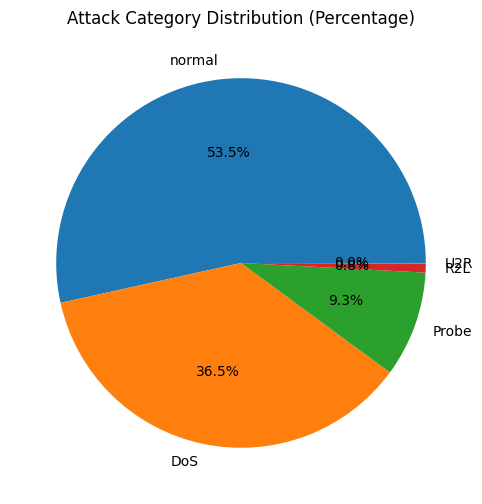

In [31]:
import matplotlib.pyplot as plt

# Get percentage distribution
attack_dist = df_train['n_label'].value_counts(normalize=True) * 100

# Plot Pie Chart
plt.figure(figsize=(6,6))
plt.pie(attack_dist, labels=attack_dist.index, autopct='%1.1f%%')
plt.title("Attack Category Distribution (Percentage)")
plt.show()

<h1>Lets see now which features are impp and which are noisy individually</h1>
<h3>lower code means</h3>
<h4>This code finds columns with the highest percentage of zeros</h4>

In [32]:
zero_ratio = (df_train == 0).mean().sort_values(ascending=False)
zero_ratio.head(10)
#so dropping num_outbound_cmds is good

# although aur bhi columns bhi rare h but still good to keep them

num_outbound_cmds     1.000000
is_host_login         0.999992
urgent                0.999929
land                  0.999802
num_shells            0.999627
su_attempted          0.999365
num_failed_logins     0.999032
root_shell            0.998658
num_file_creations    0.997722
num_access_files      0.997055
dtype: float64

In [33]:
# now going through numeric columns
df_train['protocol_type'].value_counts(normalize=True)

# so yha to be neglected zeros nhi h
# leave these columns as it is

protocol_type
tcp     0.815167
udp     0.119018
icmp    0.065816
Name: proportion, dtype: float64

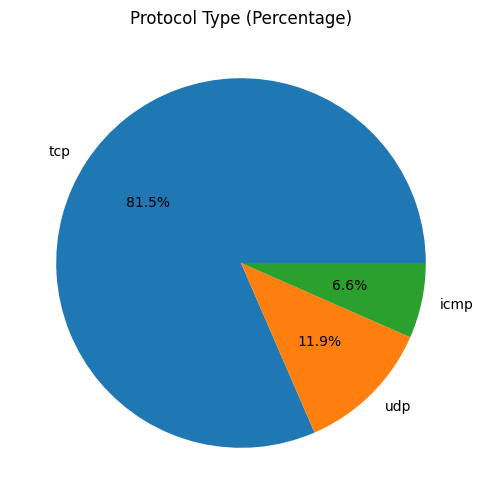

In [34]:
proto = df_train['protocol_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(proto, labels=proto.index, autopct='%1.1f%%')
plt.title("Protocol Type (Percentage)")
plt.show()


In [35]:
df_train['service'].value_counts().head(10)


service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
eco_i        4586
other        4359
ecr_i        3077
telnet       2353
finger       1767
Name: count, dtype: int64

In [36]:
df_train['flag'].value_counts()

flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

In [37]:
# strong this 
df_train.groupby('n_label')['count'].mean()
# count =

# Last 2 seconds me, same destination host par kitni connections hui hain

# see here DoS ke liye count ki frequency bhot zyzda hai


n_label
DoS       178.090034
Probe      77.052248
R2L         1.297487
U2R         5.807692
normal     22.517945
Name: count, dtype: float64

<h1>Now lets pta kre ki konsa feature sirf
kaun sa feature attack aur normal ko separate karta hai

kaun sa feature sirf noise hai</h1>

In [38]:
df_train.groupby('n_label')['count'].describe()
#count clearly DoS ko separate karta hai

,count,mean,std,min,25%,50%,75%,max
n_label,,,,,,,,
DoS,45927.0,178.090034,104.445748,1.0,109.0,172.0,249.00,511.0
Probe,11656.0,77.052248,156.470566,0.0,1.0,1.0,30.00,511.0
R2L,995.0,1.297487,0.480970,1.0,1.0,1.0,2.00,4.0
U2R,52.0,5.807692,23.454619,1.0,1.0,1.0,1.25,151.0
normal,67343.0,22.517945,54.026086,0.0,1.0,4.0,14.00,511.0


In [39]:
# step 6 { analyzing konse feature attack types mein diff laate h}
df_train['n_label']



0         normal
1         normal
2            DoS
3         normal
4         normal
           ...  
125968       DoS
125969    normal
125970    normal
125971       DoS
125972    normal
Name: n_label, Length: 125973, dtype: object

In [40]:
numeric_cols = df_train.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    print(f"\nFeature: {col}")
    print("Mean:")
    print(df_train.groupby('n_label')[col].mean())
    print("Median:")
    print(df_train.groupby('n_label')[col].median())



Feature: duration
Mean:
n_label
DoS          0.006227
Probe     2074.858185
R2L        633.417085
U2R         80.942308
normal     168.587396
Name: duration, dtype: float64
Median:
n_label
DoS        0.0
Probe      0.0
R2L        0.0
U2R       46.0
normal     0.0
Name: duration, dtype: float64

Feature: src_bytes
Mean:
n_label
DoS         1176.321162
Probe     385679.838367
R2L       307727.300503
U2R          906.230769
normal     13133.279331
Name: src_bytes, dtype: float64
Median:
n_label
DoS         0.0
Probe       1.0
R2L       334.0
U2R       273.0
normal    233.0
Name: src_bytes, dtype: float64

Feature: dst_bytes
Mean:
n_label
DoS          169.201537
Probe     181074.911805
R2L        81822.026131
U2R         5141.961538
normal      4329.685223
Name: dst_bytes, dtype: float64
Median:
n_label
DoS          0.0
Probe        0.0
R2L          0.0
U2R       2907.0
normal     379.0
Name: dst_bytes, dtype: float64

Feature: land
Mean:
n_label
DoS       0.000392
Probe     0.000000
R2L 

<div style="font-family:Arial; line-height:1.5; font-size:15px;">

  

  <h3 style="color:#28a745;">1) DoS (Denial-of-Service)</h3>
  <ul>
    <li><b>Short duration</b></li>
    <li><b>Low bytes</b> (src/dst ≈ 0)</li>
    <li><b>High errors</b> → serror_rate, srv_serror_rate high</li>
    <li><b>High connection counts</b> → count, srv_count high</li>
  </ul>
  <p><b>Meaning:</b> Flooding without payload, causing server errors.</p>

  <h3 style="color:#28a745;">2) Probe (Scanning)</h3>
  <ul>
    <li><b>Mixed duration</b></li>
    <li><b>High reverse errors</b> → rerror_rate, srv_rerror_rate</li>
    <li><b>Scanning patterns</b> → same_srv_rate, diff_srv_rate, srv_diff_host_rate</li>
  </ul>
  <p><b>Meaning:</b> Scans many hosts/services, causing reject responses.</p>

  <h3 style="color:#28a745;">3) R2L (Remote-to-Local)</h3>
  <ul>
    <li><b>Successful logins</b> → logged_in high</li>
    <li><b>Guest login activity</b> → is_guest_login high</li>
    <li><b>File access behavior</b> → hot, num_access_files, num_file_creations</li>
    <li><b>Moderate bytes</b></li>
  </ul>
  <p><b>Meaning:</b> Stolen credentials + internal system/file probing.</p>

  <h3 style="color:#28a745;">4) U2R (User-to-Root)</h3>
  <ul>
    <li><b>Privilege escalation</b> → root_shell, num_root high</li>
    <li><b>Already logged-in user</b></li>
    <li><b>High response bytes</b></li>
  </ul>
  <p><b>Meaning:</b> Normal user gains root privileges.</p>

  <h3 style="color:#28a745;">5) Normal</h3>
  <ul>
    <li><b>Low errors</b></li>
    <li><b>No privilege signals</b></li>
    <li><b>Moderate traffic</b></li>
    <li><b>Valid user logins</b></li>
  </ul>
  <p><b>Meaning:</b> Legitimate usage without anomalies.</p>

  <hr style="margin:15px 0;">

  <h2 style="color:#2c7be5;">Quick Feature Mapping</h2>

  <table border="1" cellpadding="6" cellspacing="0" style="border-collapse:collapse; font-size:14px;">
    <tr>
      <th>Attack Type</th>
      <th>Key Indicators</th>
    </tr>
    <tr>
      <td><b>DoS</b></td>
      <td>count, srv_count, serror_rate ↑, bytes ↓</td>
    </tr>
    <tr>
      <td><b>Probe</b></td>
      <td>rerror_rate, srv_rerror_rate, scanning rates ↑</td>
    </tr>
    <tr>
      <td><b>R2L</b></td>
      <td>logged_in, is_guest_login, file access features</td>
    </tr>
    <tr>
      <td><b>U2R</b></td>
      <td>root_shell, num_root, hot</td>
    </tr>
    <tr>
      <td><b>Normal</b></td>
      <td>low errors, no root, moderate usage</td>
    </tr>
  </table>

  <br>

  <h3 style="color:#2c7be5;">One-Line Summary</h3>
  <ul>
    <li><b>DoS:</b> floods without payload & triggers errors</li>
    <li><b>Probe:</b> scans ports/services and gets error responses</li>
    <li><b>R2L:</b> remote login & file access patterns</li>
    <li><b>U2R:</b> privilege escalation to root after login</li>
    <li><b>Normal:</b> stable & low-error network usage</li>
  </ul>

</div>


<h1>step 7 multivariate analysis</h1>

In [41]:
numeric_cols = df_train.select_dtypes(include=['int64','float64']).columns
corr = df_train[numeric_cols].corr()


In [42]:
corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,...,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,-0.156311
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.022592
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.018076
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.037038
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,...,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,-0.157130
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.016411
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,...,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670,-0.160013
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.073178
logged_in,-0.064218,-0.003353,-0.002894,-0.011402,-0.072418,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.624365,0.604058,-0.256065,-0.160994,-0.055953,-0.491478,-0.493264,-0.275972,-0.272806,0.269818
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002014,0.019085,0.014413,1.000000,...,-0.010321,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,-0.006101


In [43]:
# SERROR_FAMILY = {
#   serror_rate,
#   srv_serror_rate,
#   dst_host_serror_rate,
#   dst_host_srv_serror_rate }
# strongly corelated , corrof nearly 1

# RERROR_FAMILY = {
#   rerror_rate,
#   srv_rerror_rate,
#   dst_host_rerror_rate,
#   dst_host_srv_rerror_rate
# }    good similarity



<h1>now alag alag ffeatures milkr label ko kaise classify krte hai> </h1>
<h2>An attack is never one signal.
It’s a combination of signals firing together.</h2>

In [44]:
df_train.groupby('n_label')[[
    'count',
    'srv_count',
    'serror_rate',
    'dst_host_serror_rate',
    'logged_in'
]].mean().loc['DoS']


count                   178.090034
srv_count                32.656346
serror_rate               0.748494
dst_host_serror_rate      0.747922
logged_in                 0.020837
Name: DoS, dtype: float64

<h4>above code confirms Confirms DoS flooding behavior</h4>

In [45]:
df_train.groupby('n_label')[[
    'diff_srv_rate',
    'dst_host_diff_srv_rate',
    'rerror_rate'
]].mean().loc['Probe']


diff_srv_rate             0.256567
dst_host_diff_srv_rate    0.401263
rerror_rate               0.437319
Name: Probe, dtype: float64

<h4>Confirms scanning behavior , 
 Multiple services + rejections</h4>

In [46]:
df_train.groupby('n_label')[[
    'num_failed_logins',
    'num_access_files',
    'count'
]].mean().loc['R2L']


num_failed_logins    0.056281
num_access_files     0.010050
count                1.297487
Name: R2L, dtype: float64

Above code Confirms low-volume, high-content anomaly
, Traffic features don’t help here

In [47]:
df_train.groupby('n_label')[[
    'root_shell',
    'su_attempted',
    'num_root',
    'count'
]].mean().loc['U2R']


root_shell      0.500000
su_attempted    0.000000
num_root        0.788462
count           5.807692
Name: U2R, dtype: float64

Above code Confirms U2R is content-only
, Traffic features useless

In [48]:
####   group summary now
numeric_cols = df_train.select_dtypes(include=['int64','float64']).columns

df_train.groupby('n_label')[numeric_cols].mean()



,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
n_label,,,,,,,,,,,,,,,,,,,,,
DoS,0.006227,1176.321162,169.201537,0.000392,0.062229,0.000000,0.039889,0.000000,0.020837,0.019226,...,26.524005,0.123423,0.066333,0.049492,0.001647,0.747922,0.744434,0.157569,0.151286,19.311560
Probe,2074.858185,385679.838367,181074.911805,0.000000,0.000000,0.000000,0.001630,0.000343,0.007121,0.000601,...,42.367193,0.390825,0.401263,0.651840,0.187343,0.044757,0.039799,0.389717,0.441030,16.461050
R2L,633.417085,307727.300503,81822.026131,0.000000,0.000000,0.003015,8.334673,0.056281,0.913568,0.077387,...,42.440201,0.727377,0.021307,0.596915,0.085739,0.023849,0.015960,0.051116,0.047367,9.878392
U2R,80.942308,906.230769,5141.961538,0.000000,0.000000,0.019231,1.403846,0.019231,0.884615,1.211538,...,9.884615,0.781154,0.040000,0.568269,0.081154,0.000000,0.004808,0.039615,0.019038,4.403846
normal,168.587396,13133.279331,4329.685223,0.000104,0.000000,0.000148,0.230655,0.001381,0.710646,0.507076,...,190.285761,0.811875,0.040134,0.121726,0.025996,0.013930,0.006116,0.046589,0.044698,20.315920


<div style="font-family:Arial; line-height:1.5; font-size:15px;">

  <h2>Insights from Mean Table (NSL-KDD)</h2>

  <!-- A: Traffic Volume -->
  <h3>A) Traffic Volume Features</h3>
  <p><b>Columns:</b> duration, src_bytes, dst_bytes</p>
  <ul>
    <li><b>Probe</b>
      <ul>
        <li>Very high duration & bytes</li>
        <li>Indicates scanning / data collection</li>
      </ul>
    </li>
    <li><b>R2L</b>
      <ul>
        <li>High duration & medium-high bytes</li>
        <li>Indicates remote login sessions</li>
      </ul>
    </li>
    <li><b>DoS</b>
      <ul>
        <li>Very low duration & low bytes</li>
        <li>Indicates flooding without payload</li>
      </ul>
    </li>
    <li><b>U2R</b>
      <ul>
        <li>Short duration with small bytes</li>
        <li>Indicates quick exploitation</li>
      </ul>
    </li>
    <li><b>Normal</b>
      <ul>
        <li>Moderate duration & bytes</li>
        <li>Typical user behavior</li>
      </ul>
    </li>
  </ul>
  <p><b>Key Insight:</b> Volume separates DoS (low) vs Probe/R2L (high) vs Normal (moderate).</p>

  <!-- B: Login Behavior -->
  <h3>B) Login & Access Behavior</h3>
  <p><b>Columns:</b> logged_in, num_failed_logins, hot, num_compromised</p>
  <ul>
    <li><b>R2L</b>
      <ul>
        <li>logged_in very high</li>
        <li>hot high (file access)</li>
      </ul>
    </li>
    <li><b>U2R</b>
      <ul>
        <li>logged_in very high</li>
        <li>num_compromised high</li>
      </ul>
    </li>
    <li><b>normal</b>
      <ul>
        <li>logged_in moderate</li>
        <li>no file compromise</li>
      </ul>
    </li>
    <li><b>DoS / Probe</b>
      <ul>
        <li>almost no login activity</li>
      </ul>
    </li>
  </ul>
  <p><b>Key Insight:</b> Login features distinguish R2L/U2R from DoS/Probe.</p>

  <!-- C: Error Response Behavior -->
  <h3>C) Error & Response Behavior</h3>
  <p><b>Columns:</b> dst_host_serror_rate, dst_host_rerror_rate, dst_host_srv_serror_rate</p>
  <ul>
    <li><b>DoS</b>
      <ul>
        <li>dst_host_serror_rate very high</li>
        <li>Indicates server overload errors</li>
      </ul>
    </li>
    <li><b>Probe</b>
      <ul>
        <li>dst_host_rerror_rate & srv_rerror_rate high</li>
        <li>Indicates scanning rejects</li>
      </ul>
    </li>
    <li><b>R2L / U2R / normal</b>
      <ul>
        <li>low error rates</li>
      </ul>
    </li>
  </ul>
  <p><b>Key Insight:</b> DoS = service errors, Probe = reverse errors, Normal = clean.</p>

  <!-- D: Service Diversity -->
  <h3>D) Service Diversity & Scanning</h3>
  <p><b>Columns:</b> dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_srv_count</p>
  <ul>
    <li><b>Probe</b>
      <ul>
        <li>diff_srv_rate high</li>
        <li>svc scanning across hosts</li>
      </ul>
    </li>
    <li><b>normal</b>
      <ul>
        <li>same_srv_rate high</li>
        <li>Repeated use of one service</li>
      </ul>
    </li>
    <li><b>R2L / U2R</b>
      <ul>
        <li>same_srv_rate high</li>
        <li>Stick to single service post login</li>
      </ul>
    </li>
    <li><b>DoS</b>
      <ul>
        <li>same_srv_rate low</li>
      </ul>
    </li>
  </ul>
  <p><b>Key Insight:</b> High diversity = Probe, High single-service = Normal/R2L/U2R.</p>

  <!-- E: Privilege Escalation -->
  <h3>E) Privilege Escalation Signals</h3>
  <p><b>Columns:</b> num_compromised, (root_shell not shown but relevant)</p>
  <ul>
    <li><b>U2R</b>
      <ul>
        <li>num_compromised highest</li>
        <li>indicates root-level actions</li>
      </ul>
    </li>
    <li><b>R2L</b>
      <ul>
        <li>moderate compromise</li>
      </ul>
    </li>
    <li><b>normal / Probe / DoS</b>
      <ul>
        <li>almost zero compromise</li>
      </ul>
    </li>
  </ul>
  <p><b>Key Insight:</b> Compromise metrics highlight U2R attacks.</p>

  <!-- F: Difficulty -->
  <h3>F) Difficulty of Detection</h3>
  <p><b>Column:</b> difficulty</p>
  <ul>
    <li><b>normal / DoS</b> → highest difficulty (~19–20)</li>
    <li><b>Probe</b> → medium difficulty (~16)</li>
    <li><b>R2L</b> → low difficulty (~9)</li>
    <li><b>U2R</b> → lowest difficulty (~4)</li>
  </ul>
  <p><b>Key Insight:</b> R2L/U2R are stealthier & rarer → harder for ML models.</p>

  <!-- Summary -->
  <h3>Overall Takeaways</h3>
  <ul>
    <li>DoS = low volume + high service errors</li>
    <li>Probe = high scanning diversity + reverse errors</li>
    <li>R2L = successful login + file access patterns</li>
    <li>U2R = privilege escalation signals</li>
    <li>Normal = moderate traffic + low errors</li>
  </ul>

</div>


In [49]:
drop_cols = [
    # Completely useless (zero variance)
    'num_outbound_cmds',

    # Metadata column → causes data leakage
    'difficulty',

    # Almost always zero, no meaningful separation
    'is_host_login',

    # Redundant SYN error rate features (highly correlated)
    'srv_serror_rate',
    'dst_host_srv_serror_rate',

    # Redundant REJ error rate features (highly correlated)
    'srv_rerror_rate',
    'dst_host_srv_rerror_rate'
]


In [50]:
drop_cols = [
    #'num_outbound_cmds',   -> ye phle delete kr chuke h
    'difficulty',
    'is_host_login',
    'srv_serror_rate',
    'dst_host_srv_serror_rate',
    'srv_rerror_rate',
    'dst_host_srv_rerror_rate'
]

df_train.drop(columns=drop_cols, inplace=True)



In [51]:
df_train.shape

(125973, 38)

In [52]:
df_train = df_train.drop(columns='label')
df_train.head(5)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,n_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.05,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,255,26,0.10,0.05,0.00,0.00,1.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.00,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,normal


<h1>we will train now several models and choose best one</h1>

In [64]:
test_path = r"/kaggle/input/nslkdd/KDDTest+.txt"
df_test = pd.read_csv(test_path, header=None)
df_test.columns = columns
df_test=df_test.drop(columns='difficulty')

In [65]:
df_test.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
9664,0,udp,other,SF,1,1,0,0,0,0,...,1,0.00,0.76,0.99,0.00,0.0,0.0,0.00,0.00,satan
22293,906,tcp,http,RSTR,62344,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.41,0.41,apache2
13534,282,tcp,ftp,SF,162,599,0,0,0,2,...,84,0.47,0.03,0.01,0.00,0.0,0.0,0.00,0.00,warezmaster
8309,0,tcp,http,SF,153,330,0,0,0,0,...,255,1.00,0.00,0.33,0.01,0.0,0.0,0.00,0.00,normal
15559,0,udp,domain_u,SF,46,79,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.00,0.00,normal


In [66]:
df_test.shape

(22544, 42)

<h1>making data ready</h1>

In [67]:
X_train = df_train.drop(columns='n_label')
y_train = df_train['n_label']


In [68]:
num_cols = X_train.select_dtypes(include=['int64','float64'])
cat_cols = X_train.select_dtypes(include=['object'])

print(num_cols.columns)
print(cat_cols.columns)

print("NaNs:", X_train.isnull().sum())

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_rerror_rate'],
      dtype='object')
Index(['protocol_type', 'service', 'flag'], dtype='object')
NaNs: duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment               

<h1>encoding categorical cols</h1>

In [69]:
from sklearn.preprocessing import LabelEncoder

# dictionary to store encoders for later use (optional but recommended)
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    encoders[col] = le   # store for future (X_test, inference, etc.)



In [70]:
label = "label"
X_test = df_test.drop(columns=label)
y_test = df_test[label]

In [71]:
for col in cat_cols:
    print(col, "->")
    print("Train uniques:", len(df_train[col].unique()))
    print("Test uniques:",  len(df_test[col].unique()))
    print()

protocol_type ->
Train uniques: 3
Test uniques: 3

service ->
Train uniques: 70
Test uniques: 64

flag ->
Train uniques: 11
Test uniques: 11



In [72]:
print("Train labels:", y_train.unique())
print("Test labels:",  y_test.unique())


Train labels: ['normal' 'DoS' 'R2L' 'Probe' 'U2R']
Test labels: ['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'loadmodule' 'xterm'
 'worm' 'teardrop' 'rootkit' 'xlock' 'perl' 'land' 'xsnoop' 'sqlattack'
 'ftp_write' 'imap' 'udpstorm' 'phf']


In [73]:
print("Train label counts:\n", y_train.value_counts())
print("\nTest  label counts:\n",  y_test.value_counts())


Train label counts:
 n_label
normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

Test  label counts:
 label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
worm                  2
perl                  2
sqlattack            

In [74]:
train_cats = set(y_train.unique())
test_cats  = set(y_test.unique())

print("In test but not in train:", test_cats - train_cats)
print("In train but not in test:", train_cats - test_cats)


In test but not in train: {'smurf', 'mscan', 'udpstorm', 'buffer_overflow', 'loadmodule', 'pod', 'land', 'perl', 'multihop', 'phf', 'nmap', 'sendmail', 'sqlattack', 'neptune', 'ipsweep', 'portsweep', 'teardrop', 'rootkit', 'xterm', 'warezmaster', 'apache2', 'imap', 'xsnoop', 'snmpguess', 'mailbomb', 'snmpgetattack', 'ps', 'httptunnel', 'ftp_write', 'back', 'processtable', 'guess_passwd', 'worm', 'xlock', 'satan', 'named', 'saint'}
In train but not in test: {'R2L', 'DoS', 'Probe', 'U2R'}


<h1>now giving categories to y_test</h1>

In [75]:
dos = ['back','land','neptune','pod','smurf','teardrop','mailbomb','processtable','udpstorm','apache2','worm']
probe = ['satan','ipsweep','nmap','portsweep','mscan','saint']
r2l = ['ftp_write','guess_passwd','imap','multihop','phf','spy','warezmaster','warezclient','xlock','xsnoop',
       'snmpgetattack','snmpguess','sendmail','named','httptunnel']
u2r = ['buffer_overflow','loadmodule','rootkit','perl','sqlattack','xterm','ps']

def map_label(x):
    x = str(x).strip()   # important for safety
    if x in dos: return 'DoS'
    elif x in probe: return 'Probe'
    elif x in r2l: return 'R2L'
    elif x in u2r: return 'U2R'
    else: return 'normal'



In [76]:
y_test = y_test.apply(map_label)
print("Train:", set(y_train.unique()))
print("Test:", set(y_test.unique()))
print("Test - Train:", set(y_test.unique()) - set(y_train.unique()))



Train: {'R2L', 'DoS', 'U2R', 'Probe', 'normal'}
Test: {'R2L', 'DoS', 'U2R', 'Probe', 'normal'}
Test - Train: set()


In [77]:
y_train = df_train['n_label']   # already 5 grouped classes
y_test_raw = df_test['label']   # raw attack names


In [78]:
dos = ['back','land','neptune','pod','smurf','teardrop','mailbomb','processtable','udpstorm','apache2','worm']
probe = ['satan','ipsweep','nmap','portsweep','mscan','saint']
r2l = ['ftp_write','guess_passwd','imap','multihop','phf','spy','warezmaster','warezclient','xlock','xsnoop',
       'snmpgetattack','snmpguess','sendmail','named','httptunnel']
u2r = ['buffer_overflow','loadmodule','rootkit','perl','sqlattack','xterm','ps']

def map_label(x):
    x = str(x).strip()
    if x in dos: return 'DoS'
    elif x in probe: return 'Probe'
    elif x in r2l: return 'R2L'
    elif x in u2r: return 'U2R'
    else: return 'normal'


In [79]:
y_test = y_test_raw.apply(map_label)


In [80]:
print("Train:", set(y_train.unique()))
print("Test:", set(y_test.unique()))
print("Test - Train:", set(y_test.unique()) - set(y_train.unique()))
print("Train - Test:", set(y_train.unique()) - set(y_test.unique()))


Train: {'R2L', 'DoS', 'U2R', 'Probe', 'normal'}
Test: {'R2L', 'DoS', 'U2R', 'Probe', 'normal'}
Test - Train: set()
Train - Test: set()


In [81]:
from sklearn.preprocessing import LabelEncoder

le_y = LabelEncoder()

y_train_enc = le_y.fit_transform(y_train)
y_test_enc  = le_y.transform(y_test)

print("Classes:", le_y.classes_)
print("y_train_enc sample:", y_train_enc[:10])
print("y_test_enc sample:", y_test_enc[:10])


Classes: ['DoS' 'Probe' 'R2L' 'U2R' 'normal']
y_train_enc sample: [4 4 0 4 4 0 0 0 0 0]
y_test_enc sample: [0 0 4 1 1 4 4 2 4 2]


In [82]:
cat_cols = X_train.select_dtypes(include=['object']).columns
print(cat_cols)


Index([], dtype='object')


In [83]:
for col in cat_cols:
    X_test[col] = encoders[col].transform(X_test[col])


In [84]:
print(X_train.dtypes)
print(X_test.dtypes)


duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate            

In [85]:
train_cols = list(X_train.columns)
test_cols = list(X_test.columns)

print("Total train cols:", len(train_cols))
print("Total test cols:", len(test_cols))

print("\nAre columns identical (same order)? ⇒", train_cols == test_cols)


TypeError: 'numpy.ndarray' object is not callable

In [86]:
for col in cat_cols:
    X_test[col] = encoders[col].transform(X_test[col])


In [87]:

print(X_train.dtypes)
print(X_test.dtypes)

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate            

In [88]:
# keep only columns that exist in X_train
X_test = X_test[X_train.columns]


In [89]:
print("Train cols:", len(X_train.columns))
print("Test cols:", len(X_test.columns))
print("Identical order?", list(X_train.columns) == list(X_test.columns))


Train cols: 36
Test cols: 36


TypeError: 'numpy.ndarray' object is not callable

In [90]:
print(type(X_train.columns))
print(type(X_test.columns))


<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>


In [91]:
print(callable(X_train.columns))
print(callable(X_test.columns))

False
False


In [92]:
print(type(list))


<class 'numpy.ndarray'>


In [93]:

train_cols = X_train.columns.tolist()
test_cols = X_test.columns.tolist()

print("Total train cols:", len(train_cols))
print("Total test cols:", len(test_cols))
print("Identical order?", train_cols == test_cols)





Total train cols: 36
Total test cols: 36
Identical order? True


In [94]:
# Get categorical columns from train (original before encoding)
cat_cols_train = df_train.select_dtypes(include=['object']).columns.tolist()

# Get categorical columns from test (original before encoding)
cat_cols_test = df_test.select_dtypes(include=['object']).columns.tolist()

print("Train categorical columns:", cat_cols_train)
print("Test categorical columns:", cat_cols_test)

print("\nColumns in TEST but not in TRAIN:", set(cat_cols_test) - set(cat_cols_train))
print("Columns in TRAIN but not in TEST:", set(cat_cols_train) - set(cat_cols_test))


Train categorical columns: ['protocol_type', 'service', 'flag', 'n_label']
Test categorical columns: ['protocol_type', 'service', 'flag', 'label']

Columns in TEST but not in TRAIN: {'label'}
Columns in TRAIN but not in TEST: {'n_label'}


In [95]:
cat_cols = ['protocol_type', 'service', 'flag']
for col in cat_cols:
    print(f"\nCOLUMN: {col}")
    print("Train encoded uniques:", sorted(X_train[col].unique()))
    print("Test  encoded uniques:", sorted(X_test[col].unique()))



COLUMN: protocol_type
Train encoded uniques: [np.int64(0), np.int64(1), np.int64(2)]
Test  encoded uniques: ['icmp', 'tcp', 'udp']

COLUMN: service
Train encoded uniques: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59

In [96]:
encoders[col] = le
for col in cat_cols:
    X_test[col] = encoders[col].transform(X_test[col])


In [98]:
for col in cat_cols:
    print(f"\n{col}:")
    print("Train encoded uniques:", sorted(X_train[col].unique()))
    print("Test encoded uniques:",  sorted(X_test[col].unique()))



protocol_type:
Train encoded uniques: [np.int64(0), np.int64(1), np.int64(2)]
Test encoded uniques: [np.int64(0), np.int64(1), np.int64(2)]

service:
Train encoded uniques: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(

<h1>Now ab ham Training of diff models krenge
</h1>

In [99]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier


In [100]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.05
1,0,2,44,9,146,0,0,0,0,0,...,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00
2,0,1,49,5,0,0,0,0,0,0,...,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.00
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,0.00
125969,8,2,49,9,105,145,0,0,0,0,...,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00
125970,0,1,54,9,2231,384,0,0,0,0,...,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.01
125971,0,1,30,5,0,0,0,0,0,0,...,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,0.00


<h1>Random Forest</h1>

In [101]:
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train_enc)
rf_pred = rf.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test_enc, rf_pred))
print(classification_report(y_test_enc, rf_pred))



=== Random Forest ===
Accuracy: 0.736737047551455
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      7460
           1       0.86      0.60      0.71      2421
           2       0.67      0.00      0.00      2885
           3       0.50      0.03      0.06        67
           4       0.63      0.97      0.77      9711

    accuracy                           0.74     22544
   macro avg       0.72      0.47      0.48     22544
weighted avg       0.77      0.74      0.69     22544



In [102]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize AdaBoost
ada = AdaBoostClassifier(
    n_estimators=200,
    random_state=42
)

# Train
ada.fit(X_train, y_train_enc)

# Predict
ada_pred = ada.predict(X_test)

# Evaluation
print("\n=== AdaBoost Results ===")
print("Accuracy:", accuracy_score(y_test_enc, ada_pred))
print(classification_report(y_test_enc, ada_pred))



=== AdaBoost Results ===
Accuracy: 0.7511976579134138
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      7460
           1       0.64      0.76      0.69      2421
           2       0.82      0.01      0.02      2885
           3       0.67      0.06      0.11        67
           4       0.68      0.97      0.80      9711

    accuracy                           0.75     22544
   macro avg       0.76      0.51      0.50     22544
weighted avg       0.79      0.75      0.70     22544



In [103]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',   # prevents warnings
    random_state=42
)

# Train
xgb.fit(X_train, y_train_enc)

# Predict
xgb_pred = xgb.predict(X_test)

# Evaluation
print("\n=== XGBoost Results ===")
print("Accuracy:", accuracy_score(y_test_enc, xgb_pred))
print(classification_report(y_test_enc, xgb_pred))



=== XGBoost Results ===
Accuracy: 0.7816270404542228
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      7460
           1       0.87      0.75      0.81      2421
           2       0.97      0.06      0.11      2885
           3       0.57      0.06      0.11        67
           4       0.68      0.97      0.80      9711

    accuracy                           0.78     22544
   macro avg       0.81      0.53      0.54     22544
weighted avg       0.83      0.78      0.74     22544



In [105]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

svm = LinearSVC()
svm.fit(X_train, y_train_enc)
svm_pred = svm.predict(X_test)

print("\n=== Linear SVC ===")
print("Accuracy:", accuracy_score(y_test_enc, svm_pred))
print(classification_report(y_test_enc, svm_pred))



=== Linear SVC ===
Accuracy: 0.6123136976579134
              precision    recall  f1-score   support

           0       0.68      0.65      0.67      7460
           1       0.21      0.00      0.00      2421
           2       0.00      0.00      0.00      2885
           3       0.00      0.00      0.00        67
           4       0.58      0.92      0.71      9711

    accuracy                           0.61     22544
   macro avg       0.29      0.31      0.28     22544
weighted avg       0.50      0.61      0.53     22544



/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

<h2>Classification Metrics Explained</h2>

<h3>1. Precision</h3>
<p>
Precision measures how many of the <b>predicted positive</b> samples were actually positive.<br>
It answers: <i>"When the model predicted positive, how often was it correct?"</i>
</p>
<p><b>Formula:</b> Precision = TP / (TP + FP)</p>

<h3>2. Recall</h3>
<p>
Recall measures how many of the <b>actual positive</b> samples were correctly identified.<br>
It answers: <i>"Out of all real positives, how many did the model detect?"</i>
</p>
<p><b>Formula:</b> Recall = TP / (TP + FN)</p>

<h3>3. F1-Score</h3>
<p>
F1-score is the <b>harmonic mean</b> of Precision and Recall.<br>
It balances Precision & Recall, especially useful for <u>imbalanced datasets</u>.
</p>
<p><b>Formula:</b> F1 = 2 × (Precision × Recall) / (Precision + Recall)</p>

<h3>4. Support</h3>
<p>
Support is the number of actual samples of each class present in the dataset.<br>
It shows how many true instances of the class were there during evaluation.
</p>
<p><b>Example:</b> If class "Attack" appears 500 times in the test set, its support = 500.</p>

<hr>

<h3>Summary Table</h3>
<table border="1" cellpadding="6">
<tr><th>Metric</th><th>Meaning</th><th>Focus</th></tr>
<tr><td>Precision</td><td>How many predicted positives are correct</td><td>False Positives</td></tr>
<tr><td>Recall</td><td>How many actual positives were correctly detected</td><td>False Negatives</td></tr>
<tr><td>F1-Score</td><td>Balanced harmonic mean of Precision & Recall</td><td>Both FP & FN</td></tr>
<tr><td>Support</td><td>Number of true samples per class</td><td>Class distribution</td></tr>
</table>
